In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf

In [2]:
data = pd.read_csv('D:\\Data-science\\ToyotaCorolla - MLR.csv')
data.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [4]:
data.isna().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

* Age: Age in years
* KM: Accumulated Kilometers on odometer
* FuelType: Fuel Type (Petrol, Diesel, CNG)
* HP: Horse Power
* Automatic: Automatic ( (Yes=1, No=0)
* CC: Cylinder Volume in cubic centimeters
* Doors: Number of doors
* Weight: Weight in Kilograms
* Quarterly_Tax: 
* Price: Offer Price in EUROs

In [5]:
data['Cylinders'].unique()
data = data.drop('Cylinders', axis=1)
data

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,5,1170
...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,5,1015


In [11]:
data['Fuel_Type'].unique()

array(['Diesel', 'Petrol', 'CNG'], dtype=object)

In [7]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
data1 = data[['Fuel_Type']]
numeric_data = encoder.fit_transform(data1)
cols = encoder.get_feature_names_out(['Fuel_Type'])
df_encoded = pd.DataFrame(numeric_data,columns=cols)
data['Fuel_Type_CNG']=df_encoded['Fuel_Type_CNG']
data['Fuel_Type_Diesel']=df_encoded['Fuel_Type_Diesel']
data['Fuel_Type_Petrol']=df_encoded['Fuel_Type_Petrol']
data

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,46986,Diesel,90,0,2000,3,5,1165,0.0,1.0,0.0
1,13750,23,72937,Diesel,90,0,2000,3,5,1165,0.0,1.0,0.0
2,13950,24,41711,Diesel,90,0,2000,3,5,1165,0.0,1.0,0.0
3,14950,26,48000,Diesel,90,0,2000,3,5,1165,0.0,1.0,0.0
4,13750,30,38500,Diesel,90,0,2000,3,5,1170,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,5,1025,0.0,0.0,1.0
1432,10845,72,19000,Petrol,86,0,1300,3,5,1015,0.0,0.0,1.0
1433,8500,71,17016,Petrol,86,0,1300,3,5,1015,0.0,0.0,1.0
1434,7250,70,16916,Petrol,86,0,1300,3,5,1015,0.0,0.0,1.0


In [12]:
data[['Fuel_Type','Fuel_Type_CNG','Fuel_Type_Diesel','Fuel_Type_Petrol']]

,Fuel_Type,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,Diesel,0.0,1.0,0.0
1,Diesel,0.0,1.0,0.0
2,Diesel,0.0,1.0,0.0
3,Diesel,0.0,1.0,0.0
4,Diesel,0.0,1.0,0.0
...,...,...,...,...
1431,Petrol,0.0,0.0,1.0
1432,Petrol,0.0,0.0,1.0
1433,Petrol,0.0,0.0,1.0
1434,Petrol,0.0,0.0,1.0


In [13]:
data = data.drop('Fuel_Type', axis=1)


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             1436 non-null   int64  
 1   Age_08_04         1436 non-null   int64  
 2   KM                1436 non-null   int64  
 3   HP                1436 non-null   int64  
 4   Automatic         1436 non-null   int64  
 5   cc                1436 non-null   int64  
 6   Doors             1436 non-null   int64  
 7   Gears             1436 non-null   int64  
 8   Weight            1436 non-null   int64  
 9   Fuel_Type_CNG     1436 non-null   float64
 10  Fuel_Type_Diesel  1436 non-null   float64
 11  Fuel_Type_Petrol  1436 non-null   float64
dtypes: float64(3), int64(9)
memory usage: 134.8 KB


#### Correlation Matrix

-1 ---------- -0.5 ---------- 0 ---------- +0.5 ---------- +1

Text(0.5, 1.0, 'Correlation Heatmap')

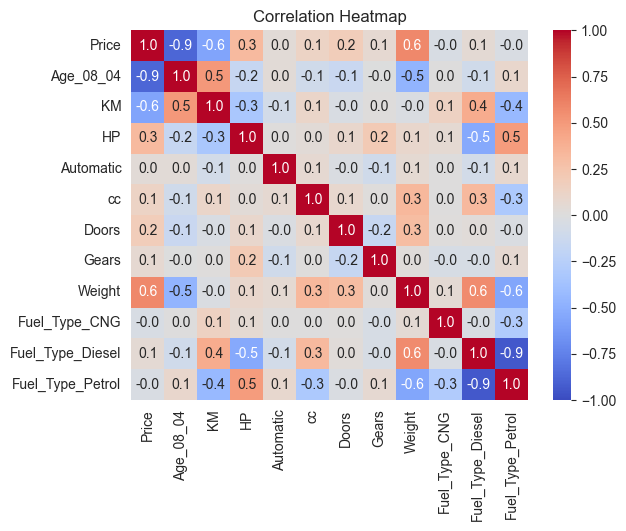

In [15]:
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.1f' ,vmin=-1, vmax=1)
plt.title('Correlation Heatmap')

We can see that Price & Weight are highly correlated variables, 
followed by price & age & KM very High correlation.
HP & Price & KM & Fuel type are show correlation.
weight & price & Age & Fuel Type are highly correlated variable
& all the above correlations are also logically true.


#### # Scatterplot between variables along with histograms

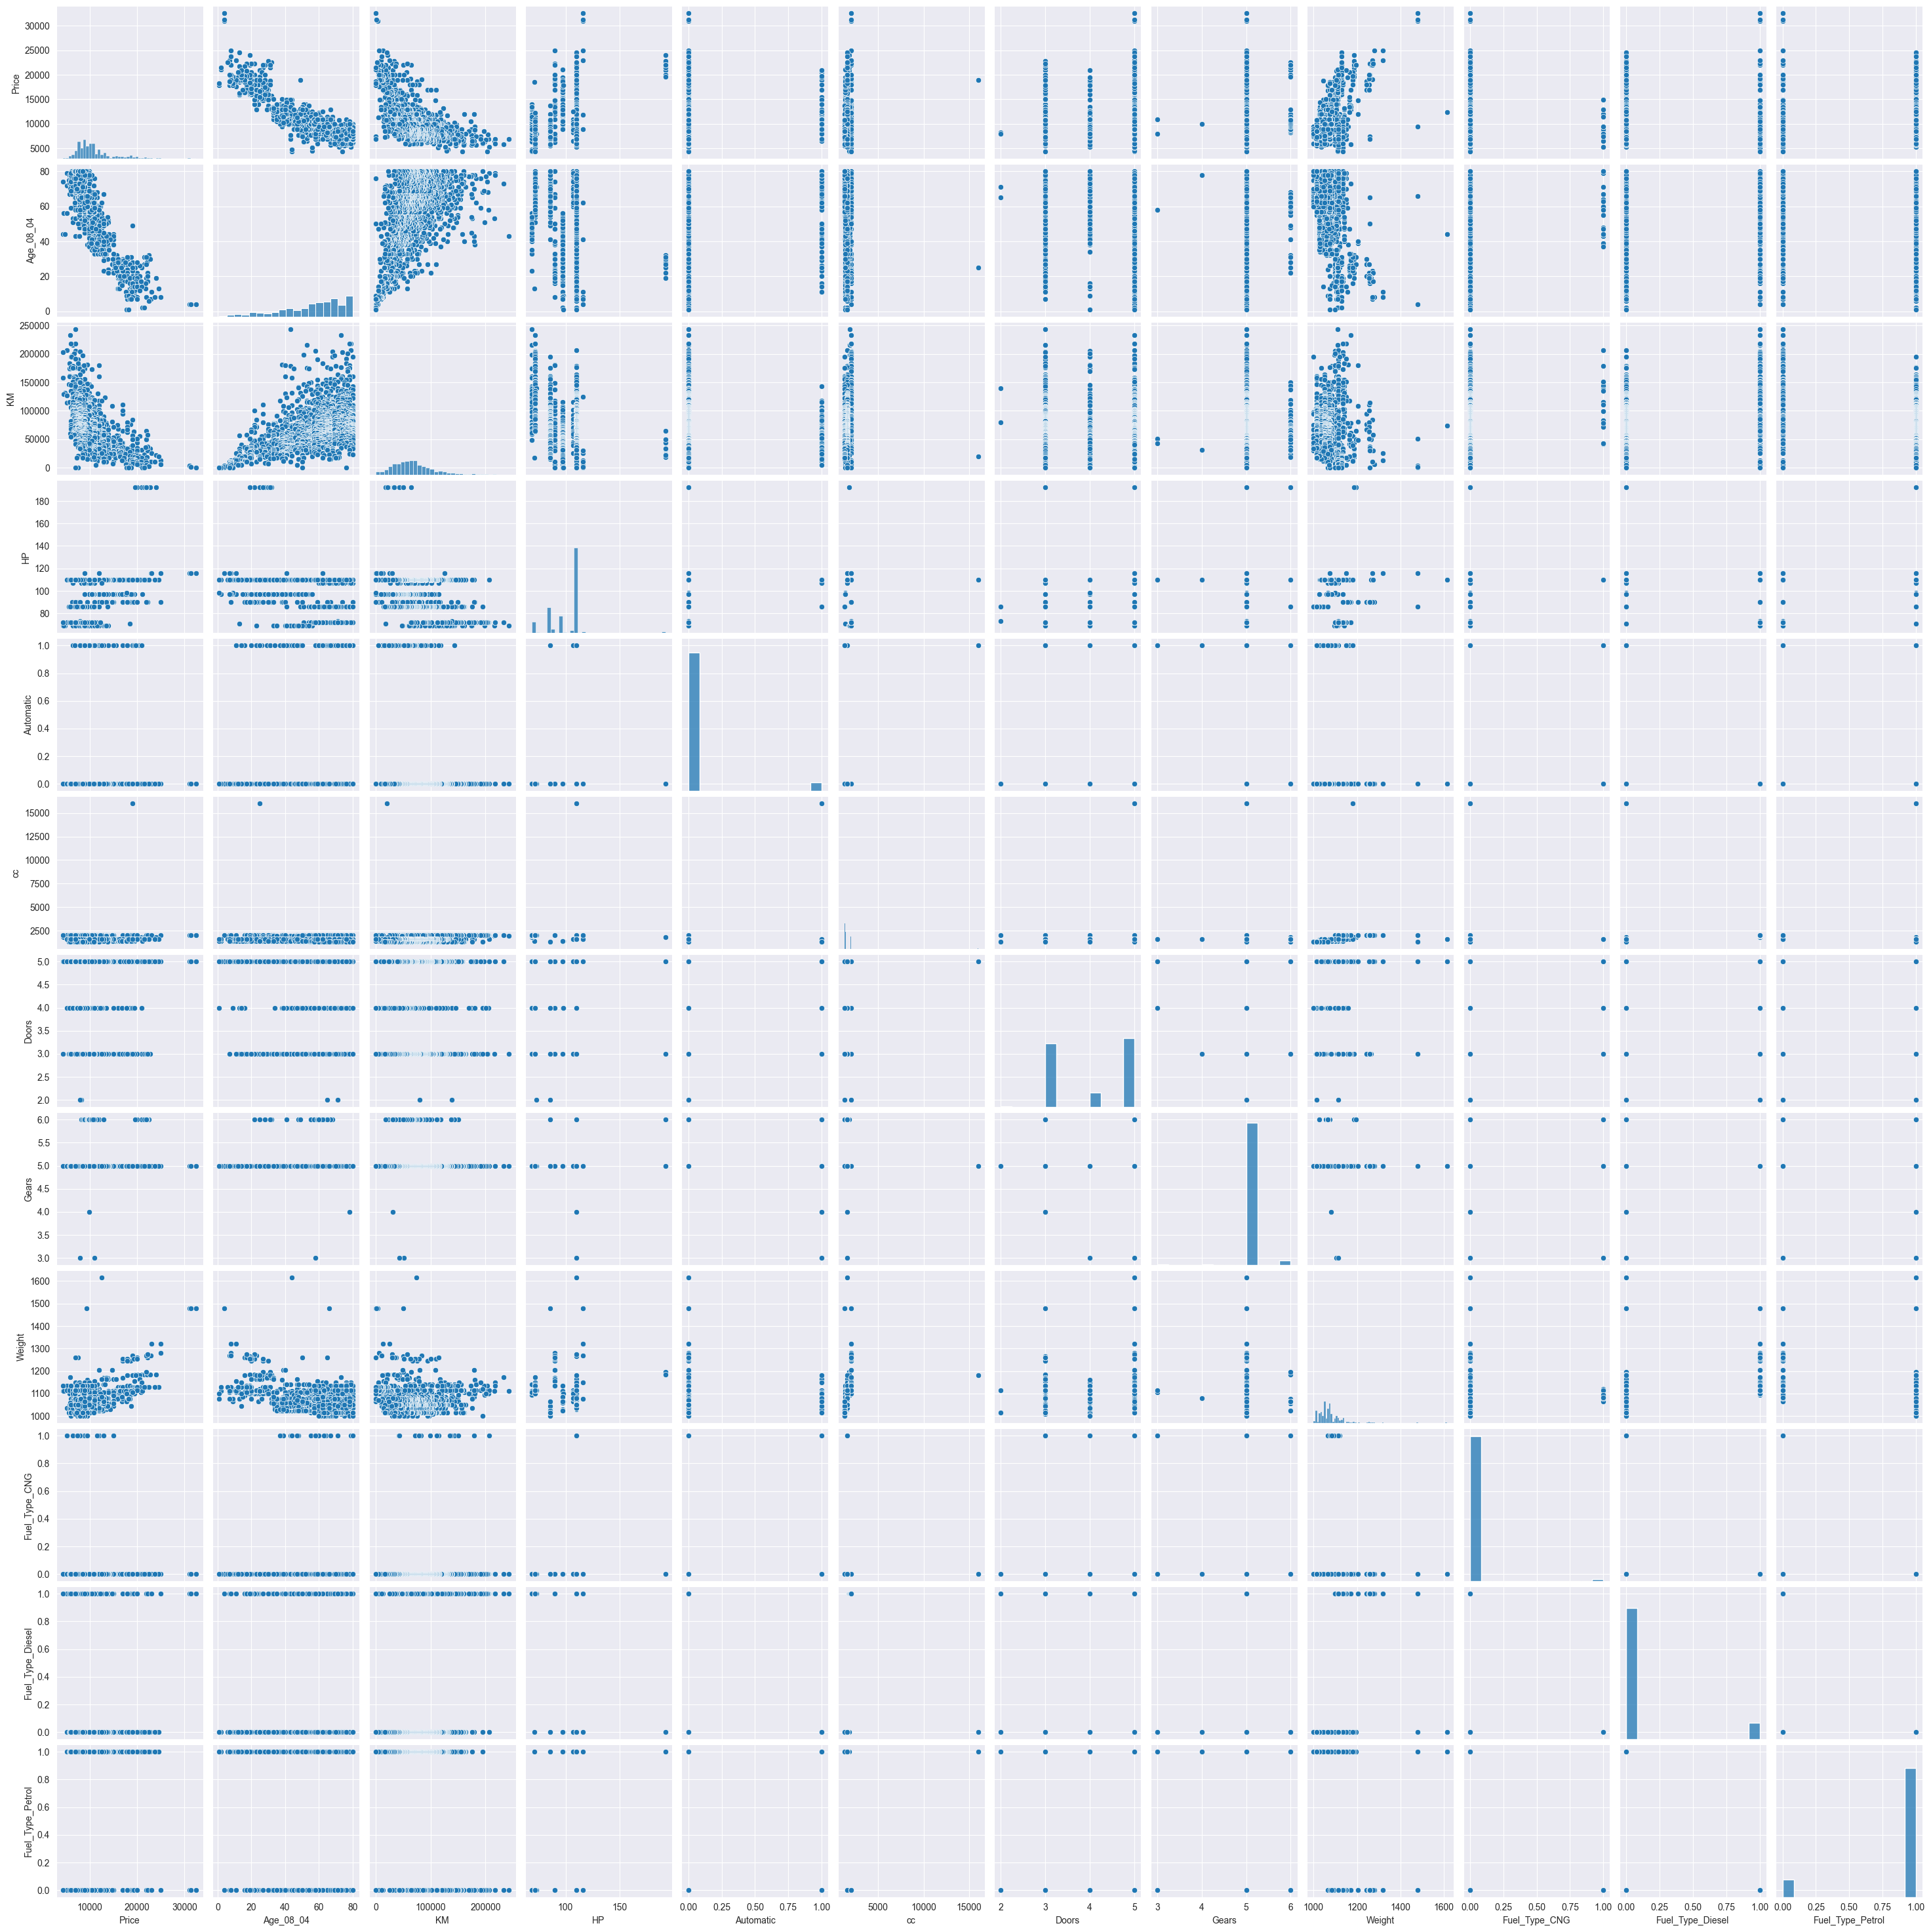

In [16]:
sns.set_style(style='darkgrid')
sns.pairplot(data)

### Preparing a model

In [127]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = data.drop('Price', axis=1)
y = data['Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [128]:
# LinearRegression Model
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(X_train, y_train)

print("Intercept:", model1.intercept_)
print("Coefficients:", model1.coef_)

Intercept: -10882.572010820131
Coefficients: [-1.21575932e+02 -1.68908406e-02  2.04260653e+01  2.19509328e+02
 -3.06743803e-02 -4.30687448e+01  5.89050820e+02  2.24379067e+01
 -6.57329190e+02 -1.13301800e+02  7.70630990e+02]


In [129]:
# PolynomialFeatures Model
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)
# LinearRegression Model
from sklearn.linear_model import LinearRegression

model2 = LinearRegression()
model2.fit(X_train, y_train)

print("Intercept:", model2.intercept_)
print("Coefficients:", model2.coef_)

Intercept: -10882.572010820131
Coefficients: [-1.21575932e+02 -1.68908406e-02  2.04260653e+01  2.19509328e+02
 -3.06743803e-02 -4.30687448e+01  5.89050820e+02  2.24379067e+01
 -6.57329190e+02 -1.13301800e+02  7.70630990e+02]


In [130]:
## interaction Model
X_interaction = X_train.copy()
X_interaction['Age_KM'] = X_train['Age_08_04'] * X_train['KM']
X_interaction['HP_Weight'] = X_train['HP'] * X_train['Weight']

# Fit the model with interaction terms
model3 = LinearRegression()
model3.fit(X_interaction, y_train)

print("Intercept:", model3.intercept_)
print("Coefficients:", model3.coef_)

Intercept: 36317.38337024236
Coefficients: [-1.49936708e+02 -5.16640787e-02 -3.79545553e+02  3.00174095e+02
  3.20940245e-02  3.41474502e+01  6.08882949e+02 -1.98700978e+01
 -6.98755780e+02  3.82867250e+02  3.15888530e+02  5.66195676e-04
  3.69128720e-01]


#### Predict the models

In [131]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
y_pred_model1 = model1.predict(X_test)
mae_model1 = mean_absolute_error(y_test, y_pred_model1)
mse_model1 = mean_squared_error(y_test, y_pred_model1)
r2_model1 = r2_score(y_test, y_pred_model1)

print("MAE:", mae_model1)
print("MSE:", mse_model1)
print("R-squared:", r2_model1)

y_pred_model2 = model2.predict(X_test)
mae_model2 = mean_absolute_error(y_test, y_pred_model2)
mse_model2 = mean_squared_error(y_test, y_pred_model2)
r2_model2 = r2_score(y_test, y_pred_model2)

print("Model2 MAE:", mae_model2)
print("Model2 MSE:", mse_model2)
print("Model3 R-squared:", r2_model2)

y_pred_model3 = model1.predict(X_test)
mae_model3 = mean_absolute_error(y_test, y_pred_model3)
mse_model3 = mean_squared_error(y_test, y_pred_model3)
r2_model3 = r2_score(y_test, y_pred_model3)

print("Model3 MAE:", mae_model3)
print("Model3 MSE:", mse_model3)
print("Model3 R-squared:", r2_model3)


MAE: 1029.1826762858386
MSE: 2040772.1509166574
R-squared: 0.8694338969560131
Model2 MAE: 1029.1826762858386
Model2 MSE: 2040772.1509166574
Model3 R-squared: 0.8694338969560131
Model3 MAE: 1029.1826762858386
Model3 MSE: 2040772.1509166574
Model3 R-squared: 0.8694338969560131


#### Apply Lasso and Ridge Regularization

In [133]:
from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
print("Intercept:", lasso_model.intercept_)

# Evaluate Lasso model
lasso_pred = lasso_model.predict(X_test)
lasso_r2 = r2_score(y_test, lasso_pred)
print("Lasso R-squared:", lasso_r2)

Intercept: -10980.529980393301
Lasso R-squared: 0.8694448595695805


C:\Users\naveen.julla\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.374e+08, tolerance: 1.433e+06
  model = cd_fast.enet_coordinate_descent(


In [134]:
from sklearn.linear_model import Ridge

# Apply Ridge regression
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train, y_train)

# Evaluate Ridge model
ridge_pred = ridge_model.predict(X_test)
ridge_r2 = r2_score(y_test, ridge_pred)
print("Ridge R-squared:", ridge_r2)


Ridge R-squared: 0.8694443949782282


#### Price predict

In [135]:
first_row_values = data.iloc[0]
new_car = pd.DataFrame({
    'Age_08_04': [23],
    'KM': [46986],
    'HP': [90],
    'Automatic': [0],
    'cc': [2000],
    'Doors': [3],
    'Gears':[5],
    'Weight': [1165],
    'Fuel_Type_CNG': [0],
    'Fuel_Type_Diesel': [1],  # Assuming the FuelType is Diesel
    'Fuel_Type_Petrol': [0], # This would be 0 because we have only Diesel
})
y_pred_model3 = model1.predict(new_car)
lasso_pred = lasso_model.predict(new_car)
ridge_pred = ridge_model.predict(new_car)

print(y_pred_model3,lasso_pred,ridge_pred)

[16147.45296362] [16147.71603116] [16147.85461613]
